# Support Vector Machine & Log-Lasso Classifiers

In [767]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("poster")

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

##Prepare data

In [734]:
#this data set has: i) candidate info; ii) movable assets; iii) immovable assets
assets_df=pd.read_csv("assets_df.csv")

In [735]:
droplist=['Unnamed: 0','Unnamed: 0.1']
for d in droplist:
    assets_df.drop( d, axis=1, inplace=True)

In [736]:
assets_df.head(1)

,"Bonds, Debentures and Shares in companies",Cash,"Deposits in Banks, Financial Institutions and Non-Banking Financial Companies",Gross Total Value (as per Affidavit),Jewellery (give details weight value),LIC or other insurance Policies,"Motor Vehicles (details of make, etc.)","NSS, Postal Savings etc","Other assets, such as values of claims / interests",Personal loans/advance given,TOTAL_MOVABLE_ASSESTS,Totals (Calculated as Sum of Values),url,winner,state,Age,Assets_Rs,Constituency,Criminal_Cases,Education_x,Liabilities_Rs,Link,Name,Winner,Year,Cogniz,Convict,Framed,Other_years,Total_Wins,History,Years_since,Incumbent,Other_elec,Common_link,Party,Education_y,State,Literacy,Agricultural Land,Commercial Buildings,Non Agricultural Land,Others,Residential Buildings,TOTAL_IMMOVABLE_ASSESTS,Total Current Market Value of (i) to (v) (as per Affidavit),year
0,NaN,70500,1519565,NaN,128501,350000,410000,316155,621439,NaN,3416160,3066160,http://myneta.info/loksabha2004/candidate.php?...,1,ANDAMAN & NICOBAR ISLANDS,65,5926740,76,0,11,272061,candidate.php?candidate_id=1,MANORANJAN BHAKTA,1,2004,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INC,Post Graduate,ANDAMAN & NICOBAR ISLANDS,86.63,846000,NaN,64580,NaN,1950000,2860580,NaN,2004


#####Step 1: Log-transform income data

In [737]:
assets_df=assets_df.replace(np.NaN,0.0)

In [738]:
assets_df=assets_df.replace('NATIONAL CAPITAL TERRITORY OF DELHI','DELHI')

In [739]:
#list(assets_df.columns)

In [743]:
logcols=list(assets_df.columns)
non_assest=('Gross Total Value (as per Affidavit)','url','year','winner','State','state','Age','Year','Winner',
            'Assets_Rs','Constituency','Criminal_Cases','Liabilities_Rs','Link','Name','Party',
            'Total Current Market Value of (i) to (v) (as per Affidavit)','Totals (Calculated as Sum of Values)',
            'Cogniz','Convict','Framed','Other_years','Total_Wins','History','Years_since','Incumbent','Other_elec',
            'Common_link','Education_x','Education_y','Literacy')


In [744]:
for i in non_assest:
    try:
        logcols.remove(i)
    except:
        print i
print len(logcols)

16


In [746]:
#log transofrm asset info:
for st in logcols:
    assets_df[st]=np.log(assets_df[st]+1)

In [747]:
assets_df.to_csv("lognorm_assets_df.csv", header=True, index=True, encoding='utf-8')

Remove observations with zero total assets. 
Treat tables where immovable assets=0 as missing data since it's not credible that candidates have zero cash; they must have avoided reporting altogether...

In [748]:
#remove tables where total assests report including cash=0
nonempty=assets_df[(assets_df['TOTAL_MOVABLE_ASSESTS']!=0)]
count_nonempty=len(nonempty.TOTAL_MOVABLE_ASSESTS)
count_all=len(assets_df.TOTAL_MOVABLE_ASSESTS)
print count_all-count_nonempty

2155


#####Step 2: Standardize all the columns
In this step all the features will be normalized with zero mean and unit standard deviation.

In [684]:
#create codes for categorical variables:
#this took too much time and did not improve results to removed from iterations and fine-tuning:


#categorical = ['Party','Education','State']
for c in categorical:
    le = LabelEncoder().fit(nonempty[c])
    nonempty[c]=le.transform(nonempty[c])

In [749]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(nonempty.shape[0]), train_size=0.8)

In [750]:
mask=np.ones(nonempty.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [712]:
numeric = logcols + ['Criminal_Cases','History']

In [751]:
%%time

dftrain=nonempty[mask]
std_scale = StandardScaler().fit(dftrain[numeric])
nonempty[numeric] = std_scale.transform(nonempty[numeric])

#took too long and did not improve results to stopped it in further iterations:

#enc = OneHotEncoder().fit(dftrain[categorical])
#categorical_vars = enc.transform(nonempty[categorical]).toarray()
#standarized = []
#for x,y in zip(numeric_vars, categorical_vars):
#    standarized.append(np.concatenate([x,y]))
#    std_df = pd.DataFrame(standarized)
#std_df.head(1)

CPU times: user 5.32 s, sys: 457 ms, total: 5.77 s
Wall time: 6.1 s


/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [752]:
#standarized:
nonempty.head(2)

,"Bonds, Debentures and Shares in companies",Cash,"Deposits in Banks, Financial Institutions and Non-Banking Financial Companies",Gross Total Value (as per Affidavit),Jewellery (give details weight value),LIC or other insurance Policies,"Motor Vehicles (details of make, etc.)","NSS, Postal Savings etc","Other assets, such as values of claims / interests",Personal loans/advance given,TOTAL_MOVABLE_ASSESTS,Totals (Calculated as Sum of Values),url,winner,state,Age,Assets_Rs,Constituency,Criminal_Cases,Education_x,Liabilities_Rs,Link,Name,Winner,Year,Cogniz,Convict,Framed,Other_years,Total_Wins,History,Years_since,Incumbent,Other_elec,Common_link,Party,Education_y,State,Literacy,Agricultural Land,Commercial Buildings,Non Agricultural Land,Others,Residential Buildings,TOTAL_IMMOVABLE_ASSESTS,Total Current Market Value of (i) to (v) (as per Affidavit),year
0,-0.430907,0.343597,1.156733,0,0.557463,1.548010,1.392833,2.406230,2.676888,-0.211965,0.982543,3066160,http://myneta.info/loksabha2004/candidate.php?...,1,ANDAMAN & NICOBAR ISLANDS,65,5926740,76,-0.093396,11,272061,candidate.php?candidate_id=1,MANORANJAN BHAKTA,1,2004,0,0,0,0,0,-0.303617,0,0,0,0,INC,Post Graduate,ANDAMAN & NICOBAR ISLANDS,86.63,1.064261,-0.662888,1.154487,-0.215711,1.194784,0.634975,0,2004
1,-0.430907,0.341207,-1.504917,0,-1.547592,1.591371,-0.742133,-0.442548,-0.377824,-0.211965,0.138524,70000,http://myneta.info/loksabha2004/candidate.php?...,0,ANDAMAN & NICOBAR ISLANDS,50,3070000,76,-0.093396,5,0,candidate.php?candidate_id=10,ASIT BARAN DUTTA,0,2004,0,0,0,0,0,-0.303617,0,0,0,0,IND,Graduate,ANDAMAN & NICOBAR ISLANDS,86.63,1.244063,-0.662888,-0.609855,-0.215711,-0.839668,0.642009,0,2004


In [688]:
#a rough attempt at using sampling weights (sid's code)
def generate_weights(Y, X_train):
    
    weight = [0,0]
    number_of_wins = np.sum(Y)
    weight[1] = float(number_of_wins)/len(Y)
    weight[0] = 1.0-weight[1]
    
    sample_weights = [weight[x] for x in Y]
    
    return np.array(sample_weights)

#Train Classifiers

The following three functions `cv_optimize`,` do_classify` and `make_roc` are adapted versions of hw and lab codes. 

`cv_optimize` uses `roc_auc_score` scoring system inside the `GridSearchCV` cross-validation loop in order to find optimizing hyper-parameters (C and gamma) based on AUC instead of accuracy score, which are less relevant in highly unbalanced data. (gamma refers to the length of the maximum margin between the hyperplane and support vectors & C is inversely related to the "leniency" or margin-of-error allowed for the classifier)

See comments in the codes for additional information.

In [760]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, make_scorer, accuracy_score
from sklearn.grid_search import GridSearchCV

In [756]:
def cv_optimize(clf, parameters, X, y, n_folds=5):
     
    #create scoring option to add different types of scorers for cross-validation:
    score_fx=make_scorer(roc_auc_score,greater_is_better=True)  
    
    #change scoring to 'None' for standard accuracy within grid search:
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_fx)
    
    #if sample_weight==True:
    #sw=generate_weights(y, X)
    #gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_fx, fit_params={'sample_weight': sw})
        
    gs.fit(X, y)
    
    print "BEST PARAMS", gs.best_params_
    best = gs.best_estimator_
    return best

#code adapted from hw3
# changes to scoring option and sampling weights option.

In [757]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds)
    
    clf=clf.fit(Xtrain, ytrain)
    #sw=generate_weights(ytrain, Xtrain)
    #clf=clf.fit(Xtrain, ytrain, sample_weight=sw)
    
    training_accuracy = clf.score(Xtrain, ytrain)
    test__accuracy = clf.score(Xtest, ytest)
    print "Based on standard predict::"
    print "  Accuracy on training data: %0.2f" % (training_accuracy)
    print "  Acurracy on test data:     %0.2f" % (test__accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "_______________________________"
    return clf, Xtrain, ytrain, Xtest, ytest

#code adapted from hw3
# removed scoring function option in both functions and embedded it make_scorer feature wth roc_auc_scorer
#added sampling weights option.

In [758]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in xrange(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

#code from lab 6

####Default probabilities in the dataset, training and test splits

In [759]:
print "winners in data set", 100*nonempty['winner'].mean(), "; losers: ",100-100*nonempty['winner'].mean()
print "winners in training set", 100*nonempty['winner'][mask].mean(),"; losers: ",100-100*nonempty['winner'][mask].mean()
print "winners in test set", 100*nonempty['winner'][~mask].mean(),"; losers: ",100-100*nonempty['winner'][~mask].mean()

winners in data set 7.74486129925 ; losers:  92.2551387007
winners in training set 7.67135389826 ; losers:  92.3286461017
winners in test set 8.03886925795 ; losers:  91.961130742


###SVM Classifier:

We test out support vector machine with class weight for our asymmetric data set. As SVMs work best with rather balanced data sets, we will sub-sample our data in the next section of this notebook.

In [761]:
from sklearn.svm import SVC

####Using default GridSeacrch optimization based on accuracy score:

Initially, we used the default `SVC()`option with accuracy score based grid-search optimization to select hyper-parameters. The following result shows that the separating hyperplane is based on support vectors that are at the edge of the data. That is, the hyperplane assumes all losses and the SVM is as good as a random guess based on all losses.

This held true even when using class weights in the SVC() function. 

In [352]:
%%time
#THIS ONE IS USING ACCURACY WITHIN THE GRIDSEARCH:
#DO NOT RERUN- SCORING ADJUSTED IN FUNCTION INVARIABLY!

#tried class class_weights={1:10}; results = same as before; didnt' work
#tried class class_weights='auto'; results = same as before; didnt' work
#adding gamma parameter options- took forever but didn't work.

clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(SVC(), 
                                                   {"C": [ 10, 1, 0.1, 0.01,0.001,0.0001,0.00001 ]}, 
                                                   nonempty,featurenames=logcols, targetname='winner',target1val=1, mask=mask)

using mask
BEST PARAMS {'C': 0.1}
Based on standard predict::
  Accuracy on training data: 0.92
  Acurracy on test data:     0.93
[[3146    0]
 [ 250    0]]
_______________________________
CPU times: user 1min 53s, sys: 2.15 s, total: 1min 55s
Wall time: 2min 7s


/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


####Using auc in GridSeacrch optimization:

To account for the imbalance in the dataset, we change the optimization parameters in the `cv_optimize` function. The hyper-parameters for the model is now selected based on the maximization of area-under-the-curve (AUC), based on true-positive and false negative rates. 

This yields a better result since the SVC is no longer making the separating hyperplane at the edge of the data; i.e. making zero differentiation between the features. Here, the support vectors are "interior" points of the dataset. The accuracy score shows that it is better on training but only as good as randomness on the test score. With C value =10, we get an accuracy on the training set of 94% but an accuracy on the test of 91%.

In [763]:
%%time
#THIS ONE IS USING ROC_AUC_SCORER WITHIN GRIDSEARCH:

clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(SVC(), 
                                                   {"C": [100,50, 10, 1, 0.1, 0.01,0.001,0.0001], }, 
                                                   nonempty,featurenames=numeric, targetname='winner',target1val=1, mask=mask)

using mask
BEST PARAMS {'C': 100}
Based on standard predict::
  Accuracy on training data: 0.98
  Acurracy on test data:     0.90
[[2973  150]
 [ 200   73]]
_______________________________
CPU times: user 3min 35s, sys: 2.92 s, total: 3min 38s
Wall time: 4min 2s


/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


#### Adding class weight to the above classifier:
We let the model decide the weights by choosing the `'auto'` weight option.

There is a significant improvement in the AUC but the accuracies of both splits decline.

In [764]:
%%time
#try with class-weight to deal with imbalance (http://scikit-learn.org/stable/modules/svm.html):
clfsvm1, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(SVC(class_weight='auto'),
                                                   {"C": [ 100,20,15,10, 1, 0.1, 0.01,0.001,0.0001]}, 
                                                   nonempty,featurenames=logcols, targetname='winner',target1val=1, mask=mask)

using mask
BEST PARAMS {'C': 1}
Based on standard predict::
  Accuracy on training data: 0.76
  Acurracy on test data:     0.74
[[2274  849]
 [  37  236]]
_______________________________
CPU times: user 7min 34s, sys: 5.8 s, total: 7min 40s
Wall time: 8min


/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Make ROC curve to assess performance:

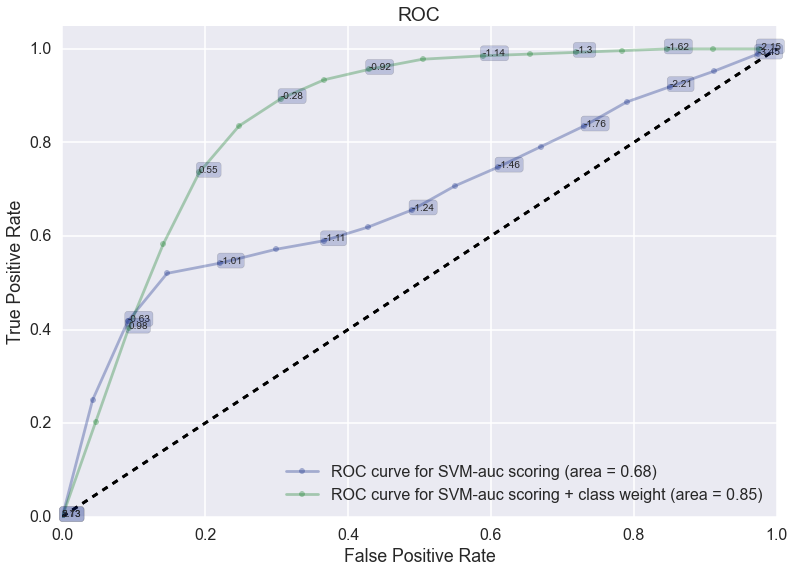

In [772]:
with sns.color_palette("dark"):
    ax= make_roc("SVM-auc scoring", clfsvm, ytest, Xtest, proba=False, labe=400, skip=200);
    make_roc("SVM-auc scoring + class weight", clfsvm1, ytest1, Xtest1, proba=False, labe=400, skip=200)

    plt.savefig('figures/Anne/SVC_AUC_ClassWeight.png', dpi=100)

#### An unsuccessful attempt at optimizing with sampling weights. 

We modified the codes above to see if embedding sampling weights would yield us better performing models. Howveer, due to the type of data or my limited know-how of implementing it for the first time, it did not do well as expected. 

The ROC curve collapses back to 0.63. We discontinue this pursuit after multiple attempts and instead proceed on to use balanced data sets further down in this notebook. 

In [576]:
sw=generate_weights(ytrain, Xtrain)

array([ 0.07840683,  0.92159317,  0.07840683, ...,  0.92159317,
        0.92159317,  0.92159317])

In [585]:
%%time
# the do_classify and cv_optimize functions were altered for this run:
svm, Xtr, ytr, Xte, yte = do_classify(SVC(), 
                                        {"C": [ 100,20,15,10, 1, 0.1, 0.01,0.001,0.0001]}, 
                                        nonempty,featurenames=logcols, targetname='winner',target1val=1, mask=mask)

using mask
BEST PARAMS {'C': 100}
Based on standard predict::
  Accuracy on training data: 0.97
  Acurracy on test data:     0.90
[[3027  119]
 [ 204   46]]
_______________________________
CPU times: user 2min 53s, sys: 2.7 s, total: 2min 55s
Wall time: 3min 4s


/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


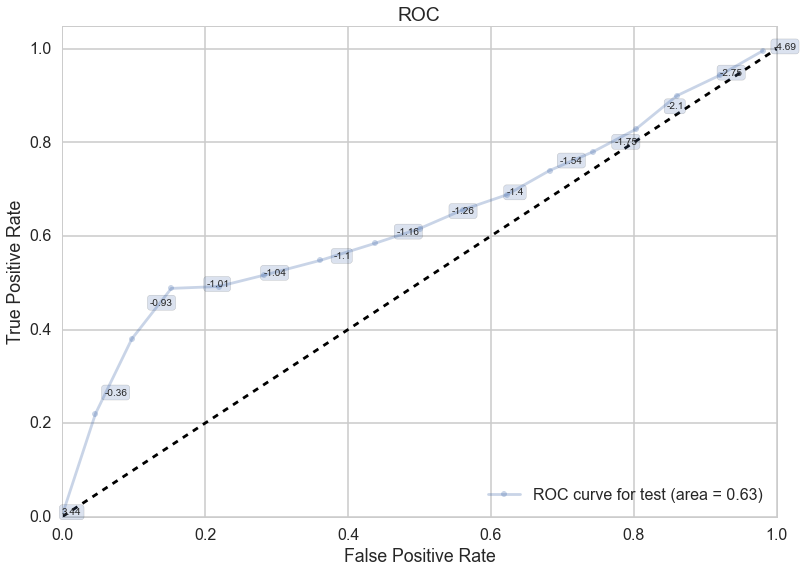

In [613]:
ax= make_roc("test", svm, yte, Xte, proba=False, labe=250, skip=200)

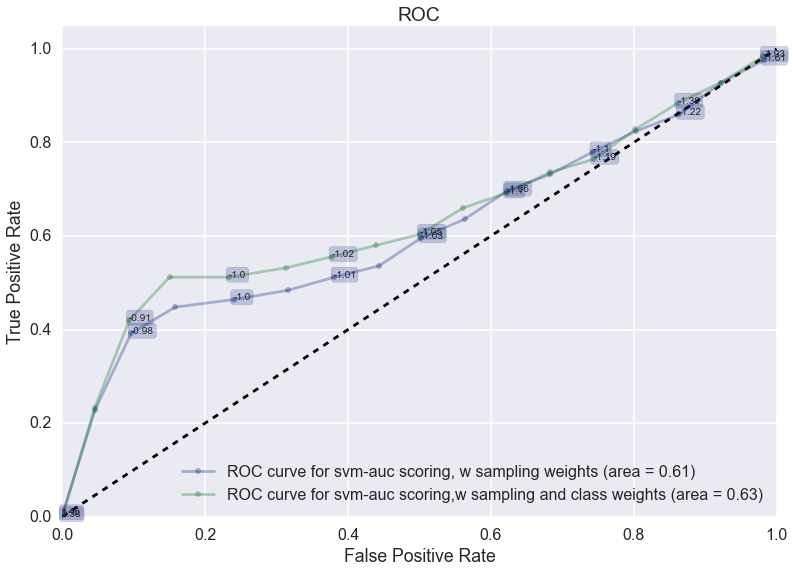

In [771]:
#Attemped putting sampling weights. 
# Changed to cv_optimize and do_classify to try adding s.w. to grid-search and the final fit. 
#It didn't seem to do greatly or I was not able to get it worked.

with sns.color_palette("dark"):
    ax= make_roc("svm-auc scoring, w sampling weights",clfsvms, ytests, Xtests, labe=400, proba=False,  skip=200);
    make_roc("svm-auc scoring,w sampling and class weights",clfsvms1, ytests1, Xtests1, ax, labe=400, proba=False,
             skip=200)
plt.savefig('figures/Anne/SampleWeightFail.png', dpi=100)

In [766]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

###Log-Lasso Classifier:

The Lasso regularization method does both parameter shrinkage and variable selection such that it selects the most important features by allowing the coefficients of certain features to reduce all the way to zero.

`penalty l1` =  lasso regularization

Lasso does better than the SVM models above with higher AUC and accuracy that is represenative of the dataset probabilities.

In [781]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l1")
parameters = {"C": [0.01,0.001,0.0001, 0.1, 1, 10, 11, 12]}
clflog, Xtrainl, ytrainl, Xtestl, ytestl = do_classify(clf,parameters, nonempty,logcols, 'winner',0, reuse_split=reuse_split)


using reuse split
BEST PARAMS {'C': 11}
Based on standard predict::
  Accuracy on training data: 0.92
  Acurracy on test data:     0.91
[[3077   46]
 [ 251   22]]
_______________________________


([array([  0.00000000e+00,   1.00000000e+00,   7.00000000e+00,
           1.60000000e+01,   1.60000000e+01,   4.10000000e+01,
           8.70000000e+01,   1.89000000e+02,   4.07000000e+02,
           2.63200000e+03]),
  array([  2.63200000e+03,   4.07000000e+02,   1.89000000e+02,
           8.70000000e+01,   4.10000000e+01,   1.60000000e+01,
           1.60000000e+01,   7.00000000e+00,   1.00000000e+00,
           0.00000000e+00])],
 array([  9.78069237e-04,   1.00782455e-01,   2.00586842e-01,
          3.00391228e-01,   4.00195614e-01,   5.00000000e-01,
          5.99804386e-01,   6.99608772e-01,   7.99413158e-01,
          8.99217545e-01,   9.99021931e-01]),
 <a list of 2 Lists of Patches objects>)

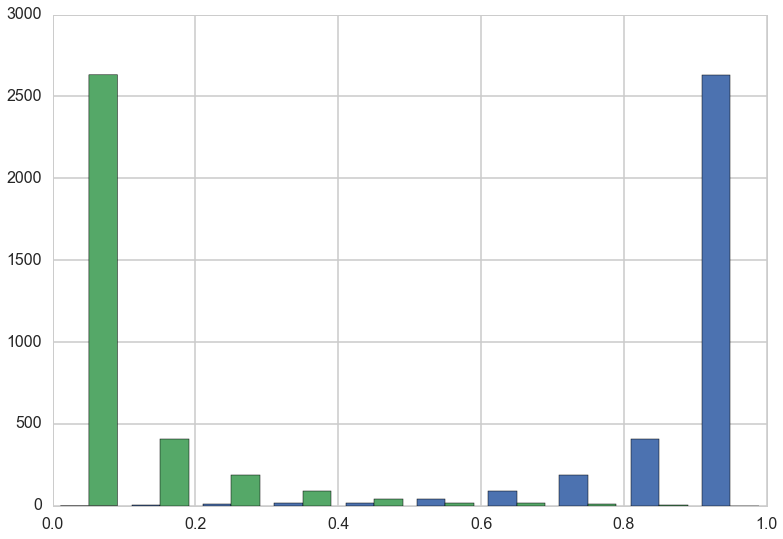

In [447]:
#plot output before classification:
plt.hist(clflog.predict_proba(Xtest))

Adding class weight to the log-lasso regression, we see a 0.01 percentage point improvement in the AUC score but a significant decline in accuracy. 

In [931]:
clf_c = LogisticRegression(penalty="l1",class_weight='auto')
parameters = {"C": [0.01,0.001,0.0001,0.00001,0.000001,0.0000001, 0.1, 1, 10,11,15,20,50,100]}
clflog_c, Xtrain_c, ytrain_c, Xtest_c, ytest_c = do_classify(clf,parameters, nonempty,logcols, 'winner',0, reuse_split=reuse_split)

using reuse split
BEST PARAMS {'C': 11}
Based on standard predict::
  Accuracy on training data: 0.92
  Acurracy on test data:     0.91
[[3077   46]
 [ 251   22]]
_______________________________


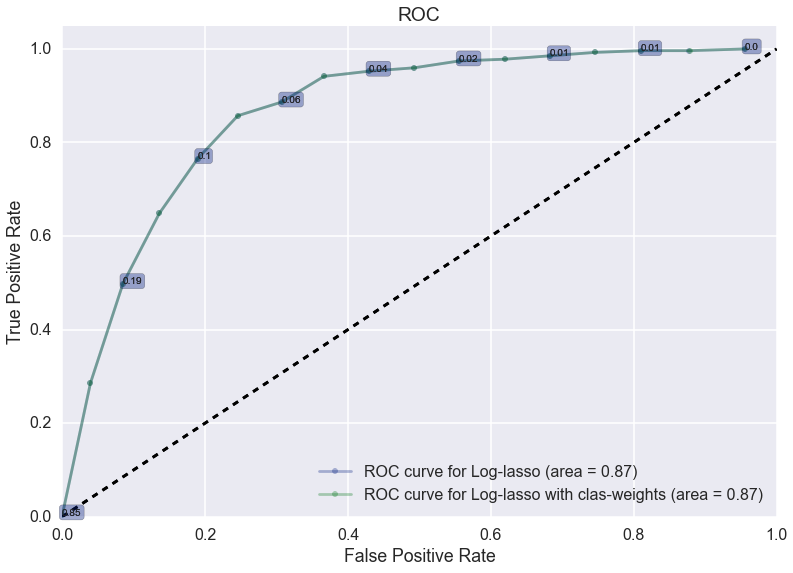

In [932]:
with sns.color_palette("dark"):
    ax=make_roc("Log-lasso", clflog, ytestl, Xtestl, proba=True, labe=400, skip=200);
    make_roc("Log-lasso with clas-weights", clflog_c, ytest_c, Xtest_c, proba=True, labe=400, skip=200)
    plt.savefig('figures/Anne/Log-lasso_Class_weights.png', dpi=100)

####Let's try using a subsample of the data to train the SVM on a balaced data:

The AUC is high in both cases but there is significant decline in accuracy of predictions.

(code help taken from hw3)

In [793]:
jtrain=np.arange(0, ytrain.shape[0])
n_win=len(jtrain[ytrain==1])
n_los=len(jtrain[ytrain==0])
print n_win, n_los
ytrain.shape

1042 12541


(13583,)

In [794]:
ilos = np.random.choice(jtrain[ytrain==0], n_win, replace=False)

In [795]:
alli=np.concatenate((jtrain[ytrain==1], ilos))
alli.shape
alli

array([    0,     2,     6, ..., 13281,  3755,  9843])

In [796]:
Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
Xtrain_new.shape, ytrain_new.shape

((2084, 18), (2084,))

reuse_split_new=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

In [797]:
clflog_b, Xtrain_b, ytrain_b, Xtest_b, ytest_b  = do_classify(clf, {"C": [0.00001,0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, nonempty,logcols, 'winner',1, reuse_split=reuse_split_new)

using reuse split
BEST PARAMS {'C': 0.1}
Based on standard predict::
  Accuracy on training data: 0.80
  Acurracy on test data:     0.77
[[2423  723]
 [  48  202]]
_______________________________


In [799]:
clfsvm_b, Xtrainb, ytrainb, Xtestb, ytestb = do_classify(SVC(class_weight='auto'), {"C": [0.00001,0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, nonempty,logcols, 'winner',1, reuse_split=reuse_split_new)

using reuse split
BEST PARAMS {'C': 0.1}
Based on standard predict::
  Accuracy on training data: 0.81
  Acurracy on test data:     0.72
[[2227  919]
 [  38  212]]
_______________________________


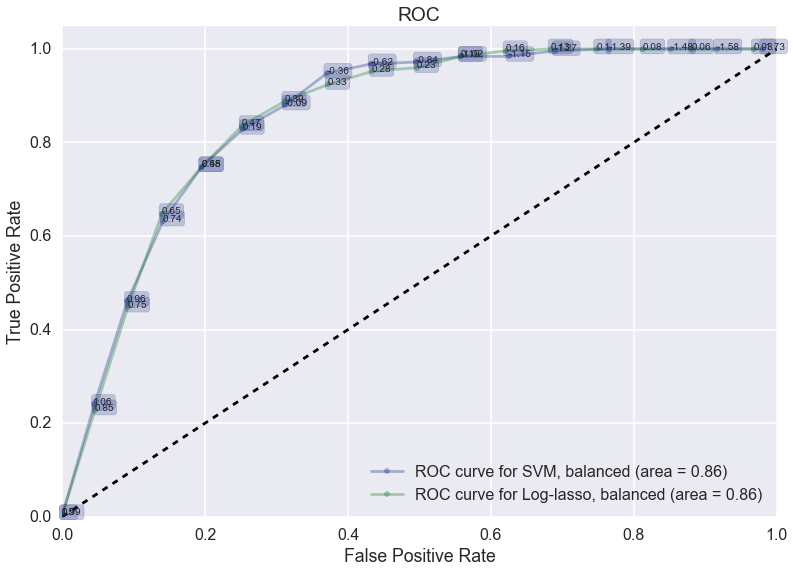

In [801]:
with sns.color_palette("dark"):   
    ax=make_roc("SVM, balanced", clfsvm_b, ytestb, Xtestb, proba=False, labe=200,skip=200)
    make_roc("Log-lasso, balanced", clflog_b, ytest_b, Xtest_b, ax=ax, proba=True, labe=200,skip=200)
    plt.savefig('figures/Anne/Balanced.png', dpi=100)

In [802]:
#clear unused data from working memory 
import gc
gc.collect()

15736

#### Train with partially balanced dataset; 2/3 losers and 1/3 winners:

To increase sample size of training set, we try partially balancing the dataset. The results are comparable as above. 

In [803]:
ilos_pb = np.random.choice(jtrain[ytrain==0], n_win*2, replace=False)

In [804]:
alli_pb=np.concatenate((jtrain[ytrain==1], ilos_pb))
alli_pb.shape

(3126,)

In [805]:
Xtrain_pb = Xtrain[alli_pb]
ytrain_pb = ytrain[alli_pb]
Xtrain_pb.shape, ytrain_pb.shape

((3126, 18), (3126,))

In [806]:
reuse_split_pb=dict(Xtrain=Xtrain_pb, Xtest=Xtest, ytrain=ytrain_pb, ytest=ytest)

In [807]:
clflog_pb,Xtrain_pb, ytrain_pb, Xtest_pb, ytest_pb = do_classify(clf, {"C": [0.00001,0.0001, 0.001, 0.01, 0.1, 1.0, 10,20,50]}, nonempty,logcols, 'winner',1, reuse_split=reuse_split_pb)

using reuse split
BEST PARAMS {'C': 10.0}
Based on standard predict::
  Accuracy on training data: 0.79
  Acurracy on test data:     0.85
[[2721  402]
 [  99  174]]
_______________________________


In [808]:
clfsvm_pb, Xtrainpb, ytrainpb, Xtestpb, ytestpb = do_classify(SVC(class_weight='auto'), 
                               {"C": [0.00001,0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}, nonempty,logcols, 'winner',1, reuse_split=reuse_split_pb)

using reuse split
BEST PARAMS {'C': 0.1}
Based on standard predict::
  Accuracy on training data: 0.78
  Acurracy on test data:     0.73
[[2257  866]
 [  35  238]]
_______________________________


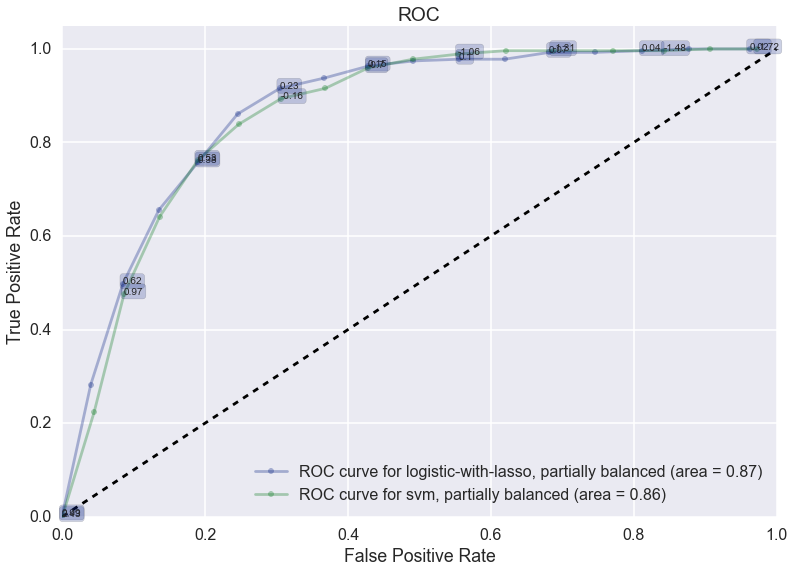

In [926]:
with sns.color_palette("dark"):
    ax= make_roc("logistic-with-lasso, partially balanced",clflog_pb, ytest_pb, Xtest_pb, labe=400, proba=True,  skip=200);
    make_roc("svm, partially balanced",clfsvm_pb, ytestpb, Xtestpb, ax=ax, labe=400, proba=False,  skip=200)
plt.savefig('figures/Anne/PBalanced.png', dpi=100)
    

##Try splitting the train and test sets by year and consitituency
Above we did the regular train,test,split by candidate (row observation) using sk learn's function. Here we will see if training the models on earlier years, or a series of constituencies will yield any predicitive power.

In [814]:
logassets_df=pd.read_csv("lognorm_assets_df.csv")

In [816]:
nonempty2=logassets_df[(logassets_df['TOTAL_MOVABLE_ASSESTS']!=0)]
count_nonempty2=len(nonempty2.TOTAL_MOVABLE_ASSESTS)
count_all=len(logassets_df.TOTAL_MOVABLE_ASSESTS)
print count_all-count_nonempty2

2155


Since the train set will depend on the split type input, 

In [904]:
#Embed standardization within do_classify to account for different types of split (YEAR,CONSTITUENCY)

def do_std_split(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, n_folds=5):
    
    if mask =='YEAR':
        print "Using 'YEAR' split"
            
        #STANDARDIZE DF BASED ON TRAIN:
        Xtr_sub=indf[indf['year'].isin([2009,2004])]
        
        std_df=indf
        std_scale = StandardScaler().fit(Xtr_sub[featurenames])
        std_df[featurenames] = std_scale.transform(std_df[featurenames]) 
        
        #CREATE TRAIN, TEST SETS
        Xtr_sub=std_df[std_df['year'].isin([2009,2004])]
        Xte_sub=std_df[std_df['year']==2014]
        Ytr_sub=(indf[indf['year'].isin([2009,2004])][targetname]==target1val)*1
        Yte_sub=(indf[indf['year'].isin([2014])][targetname]==target1val)*1       
            
        Xtrain, Xtest, ytrain, ytest = Xtr_sub[featurenames].values, Xte_sub[featurenames].values, Ytr_sub.values, Yte_sub.values
       
            
    elif mask == 'CONST':
        print "Using 'CONSTITUENCY' split"
        
        indf['year_const'] = indf['year'].apply(str) + indf.Constituency.apply(str)
        all_year_const = indf.year_const.drop_duplicates()
        test_index=np.random.choice(all_year_const, size=0.8*all_year_const.count(), replace=False)
        train_df = indf[~indf.year_const.isin(test_index)]
        
        #STANDARDIZE DF BASED ON TRAIN:
        std_df=indf
        std_scale = StandardScaler().fit(train_df[featurenames])
        std_df[featurenames] = std_scale.transform(std_df[featurenames]) 
        
        test_df = std_df[std_df.year_const.isin(test_index)]
        
        ##CREATE TRAIN, TEST SETS
        Xtrain, Xtest, ytrain, ytest = train_df[featurenames].values, test_df[featurenames].values, train_df[targetname].values, test_df[targetname].values
        
    
    #REGULAR TRAIN-TEST-SPLIT BASED ON MASK
    elif mask !=None:
        print "using mask"
        
        std_df=indf
        dftrain=std_df[mask]
        std_scale = StandardScaler().fit(dftrain[featurenames])
        std_df[featurenames] = std_scale.transform(std_df[featurenames]) 
        
        subdf=std_df[featurenames]
        X=subdf.values
        y=(indf[targetname].values==target1val)*1
        
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds)
    

    clf=clf.fit(Xtrain, ytrain)
   
    
    training_accuracy = clf.score(Xtrain, ytrain)
    test__accuracy = clf.score(Xtest, ytest)
    print "Based on standard predict::"
    print "  Accuracy on training data: %0.2f" % (training_accuracy)
    print "  Acurracy on test data:     %0.2f" % (test__accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "_______________________________"
    return clf, Xtrain, ytrain, Xtest, ytest

####SPLIT BY CONSTITUENCY:
Run SVC model:

In [923]:
%%time
clfsvmsc, Xtrainsc, ytrainsc, Xtestsc, ytestsc = do_std_split(SVC(class_weight='auto'), 
                                                   {"C": [400,350,300,200,180,160,150,140,120,100,50,10,1,0.1,0.01]}, 
                                                   nonempty2,featurenames=logcols, targetname='winner',target1val=1, mask='CONST')

/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Using 'CONSTITUENCY' split
BEST PARAMS {'C': 0.1}
Based on standard predict::
  Accuracy on training data: 0.72
  Acurracy on test data:     0.71
[[8722 3757]
 [ 125  916]]
_______________________________
CPU times: user 42.9 s, sys: 433 ms, total: 43.3 s
Wall time: 51.4 s


Save split by constituency and then run the log-lasso model:

In [907]:
reuse_split_const=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [917]:
%%time
clfsvmlc, Xtrainlc, ytrainlc, Xtestlc, ytestlc = do_std_split(clf, 
                                                   {"C": [500,550,400,300,200,150,100,10,1]}, 
                                                   nonempty2,featurenames=logcols, targetname='winner',target1val=1, mask='CONST')

/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Using 'CONSTITUENCY' split
BEST PARAMS {'C': 1}
Based on standard predict::
  Accuracy on training data: 0.92
  Acurracy on test data:     0.92
[[12164   105]
 [  988    58]]
_______________________________
CPU times: user 7.04 s, sys: 96.1 ms, total: 7.14 s
Wall time: 8.6 s


####SPLIT BY YEAR:
Also tried splitting by year, running SVC and then log-lasso on the same split

In [924]:
%%time
clfsvmsy, Xtrainsy, ytrainsy, Xtestsy, ytestsy = do_std_split(SVC(class_weight='auto'), 
                                                   {"C": [400,380,370,350,340,330,300,200,150,100,50,10]}, 
                                                   nonempty2,featurenames=logcols, targetname='winner',target1val=1, mask='YEAR')

Using 'YEAR' split
BEST PARAMS {'C': 10}
Based on standard predict::
  Accuracy on training data: 0.81
  Acurracy on test data:     0.78
[[5652 1457]
 [ 179  259]]
_______________________________
CPU times: user 6min 1s, sys: 4.44 s, total: 6min 5s
Wall time: 6min 22s


/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [910]:
reuse_split_year=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [921]:
%%time
clfsvmly, Xtrainly, ytrainly, Xtestly, ytestly = do_std_split(clf, 
                                                   {"C": [500,400,300,200,150,100,10,1]}, 
                                                   nonempty2,featurenames=logcols, 
                                                              targetname='winner',target1val=1,mask='YEAR')

Using 'YEAR' split
BEST PARAMS {'C': 500}
Based on standard predict::
  Accuracy on training data: 0.90
  Acurracy on test data:     0.93
[[6957  152]
 [ 366   72]]
_______________________________
CPU times: user 7.5 s, sys: 81.2 ms, total: 7.58 s
Wall time: 8.57 s


/Users/anneshrestha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


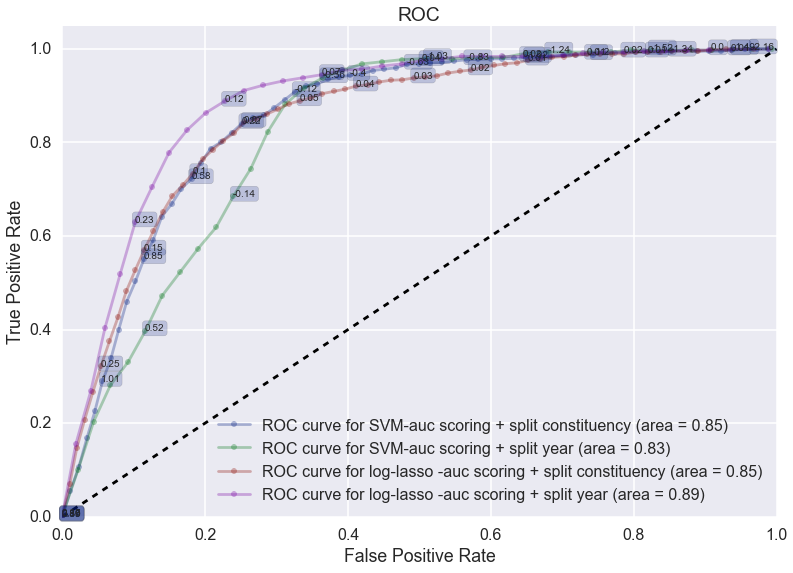

In [927]:
with sns.color_palette("dark"):
    ax=make_roc("SVM-auc scoring + split constituency", clfsvmsc, ytestsc, Xtestsc, proba=False, labe=1000, skip=200);
    make_roc("SVM-auc scoring + split year", clfsvmsy, ytestsy, Xtestsy,ax=ax, proba=False, labe=1000, skip=200);
    make_roc("log-lasso -auc scoring + split constituency", clfsvmlc, ytestlc, Xtestlc,ax=ax,
             proba=True, labe=1000, skip=200);
    make_roc("log-lasso -auc scoring + split year", clfsvmly, ytestly, Xtestly,ax=ax ,proba=True, labe=1000, skip=200)
    
plt.savefig('figures/Anne/DifferentSplits_allmodels.png', dpi=100)

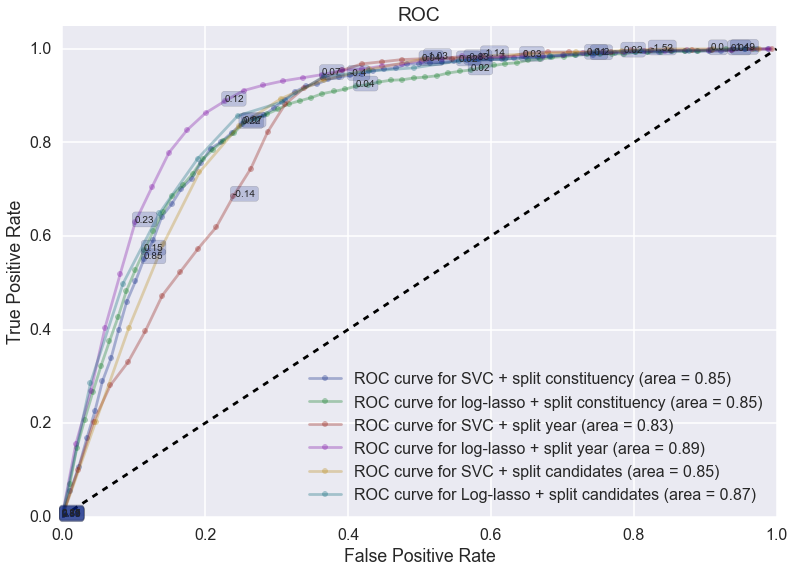

In [930]:
with sns.color_palette("dark"):
    ax=make_roc("SVC + split constituency", clfsvmsc, ytestsc, Xtestsc, proba=False, labe=2000, skip=200);
    make_roc("log-lasso + split constituency", clfsvmlc, ytestlc, Xtestlc,ax=ax,
             proba=True, labe=2000, skip=200);
    
    make_roc("SVC + split year", clfsvmsy, ytestsy, Xtestsy,ax=ax, proba=False, labe=2000, skip=200);
    make_roc("log-lasso + split year", clfsvmly, ytestly, Xtestly,ax=ax ,proba=True, labe=1000, skip=200)
    
    make_roc("SVC + split candidates", clfsvm1, ytest1, Xtest1, ax=ax, proba=False, labe=2000, skip=200)
    make_roc("Log-lasso + split candidates", clflog, ytestl, Xtestl, ax=ax, proba=True, labe=2000, skip=200);
    
plt.savefig('figures/Anne/AllDifferentSplits_allmodels.png', dpi=100)